In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
master_df = pd.read_csv(r'master_df.csv',encoding='latin-1') 

master_df.head()

,Unnamed: 0,Date,RegionName,Population,Afford_idx,Property_Crimes,Violent_Crimes,SalePrice,UnemployRate,Rate,Days_On_Zillow,Monthly_List_Zillow
0,0,2013-01-01,Alameda County,1554138,0.32,1018333,151634,429100.0,8.3,3.41,79.0,2326.0
1,1,2013-02-01,Alameda County,1554138,0.32,1018333,151634,428400.0,7.8,3.53,70.0,2229.0
2,2,2013-03-01,Alameda County,1554138,0.32,1018333,151634,436100.0,7.5,3.57,51.0,2115.0
3,3,2013-04-01,Alameda County,1554138,0.25,1018333,151634,441500.0,7.0,3.45,46.5,2105.0
4,4,2013-05-01,Alameda County,1554138,0.25,1018333,151634,460100.0,7.0,3.54,45.0,2159.0


## 1. Set up dataframe

### 1.1. Alameda

Pearson Correlation coefficient with Sale Price for all variables:
Unemployment Rate is -0.96 at strongest negative correlation. Mortgage rate has weakest correlation at -0.11. 
Only number of monthly listing in Zillow is over -0.5.  

In [3]:
alameda_df = master_df[master_df.RegionName=='Alameda County'].copy()
alameda_df.drop(['Unnamed: 0','Population', 'Property_Crimes', 'Violent_Crimes'], axis=1, inplace=True)
alameda_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 60
Data columns (total 8 columns):
Date                   61 non-null object
RegionName             61 non-null object
Afford_idx             61 non-null float64
SalePrice              61 non-null float64
UnemployRate           61 non-null float64
Rate                   61 non-null float64
Days_On_Zillow         61 non-null float64
Monthly_List_Zillow    61 non-null float64
dtypes: float64(6), object(2)
memory usage: 4.3+ KB


### 1.2. Sacramento

Pearson Correlation coefficient with Sale Price for all variables:
Unemployment Rate is -0.95 at strongest negative correlation followed by Affordability indext at -0.89. 
Mortgage rate has weakest correlation at -0.09. 
Surprisingly, for this market, number of days on Zillow has correlation of -0.55 and number of monthly listing in Zillow is at 0.16. 
Just looking at Pearson coffecient, Sacramento market has different characteristics than Alameda. 

In [4]:
sac_df = master_df[master_df.RegionName=='Sacramento County'].copy()
sac_df.drop(['Unnamed: 0','Population', 'Property_Crimes', 'Violent_Crimes'], axis=1, inplace=True)
sac_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 61 to 121
Data columns (total 8 columns):
Date                   61 non-null object
RegionName             61 non-null object
Afford_idx             61 non-null float64
SalePrice              61 non-null float64
UnemployRate           61 non-null float64
Rate                   61 non-null float64
Days_On_Zillow         61 non-null float64
Monthly_List_Zillow    61 non-null float64
dtypes: float64(6), object(2)
memory usage: 4.3+ KB


### 1.3. L.A.

Pearson Correlation coefficient with Sale Price for all variables:
Unemployment Rate is -0.93 at strongest negative correlation followed by Affordability indext and Monthly listing at -0.67. 
Mortgage rate has weakest correlation at -0.11. 
L.A. is yet again different from Sacramento and Alameda in that affordability index and number of monthly listing is over -0.5.

In [5]:
la_df = master_df[master_df.RegionName=='Los Angeles County'].copy()
la_df.drop(['Unnamed: 0','Population', 'Property_Crimes', 'Violent_Crimes'], axis=1, inplace=True)
la_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 122 to 182
Data columns (total 8 columns):
Date                   61 non-null object
RegionName             61 non-null object
Afford_idx             61 non-null float64
SalePrice              61 non-null float64
UnemployRate           61 non-null float64
Rate                   61 non-null float64
Days_On_Zillow         61 non-null float64
Monthly_List_Zillow    61 non-null float64
dtypes: float64(6), object(2)
memory usage: 4.3+ KB


## 2. Try VAR Vector Auto Regression: https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/ 

http://barnesanalytics.com/analyzing-multivariate-time-series-using-arimax-in-python-with-statsmodels

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/ -> good explanation on how to interpret results.

In [6]:
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import statsmodels.api as sm

In [15]:
alameda_df['Date'] = pd.to_datetime(alameda_df.Date)
alameda_data = alameda_df.drop(['Date'], axis=1)
alameda_data.index = alameda_df.Date

alameda_data.drop(['RegionName'], axis=1, inplace=True)
alameda_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61 entries, 2013-01-01 to 2018-01-01
Data columns (total 6 columns):
Afford_idx             61 non-null float64
SalePrice              61 non-null float64
UnemployRate           61 non-null float64
Rate                   61 non-null float64
Days_On_Zillow         61 non-null float64
Monthly_List_Zillow    61 non-null float64
dtypes: float64(6)
memory usage: 3.3 KB


C:\Users\yulmee\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\yulmee\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\yulmee\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\yulmee\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:            D.SalePrice   No. Observations:                   60
Model:                ARIMA(10, 1, 1)   Log Likelihood                -594.395
Method:                       css-mle   S.D. of innovations                nan
Date:                Wed, 18 Sep 2019   AIC                           1216.790
Time:                        19:55:20   BIC                           1246.111
Sample:                    02-01-2013   HQIC                          1228.259
                         - 01-01-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4409.9259   2884.885      1.529      0.133   -1244.345    1.01e+04
UnemployRate         168.6448    558.174      0.302      0.764    -925.355    1262.645
ar.L1.D.SalePrice   

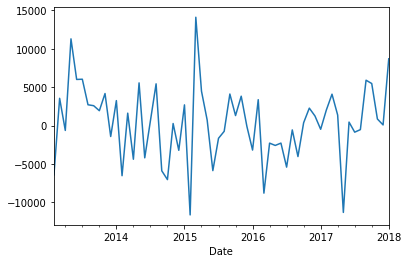

C:\Users\yulmee\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


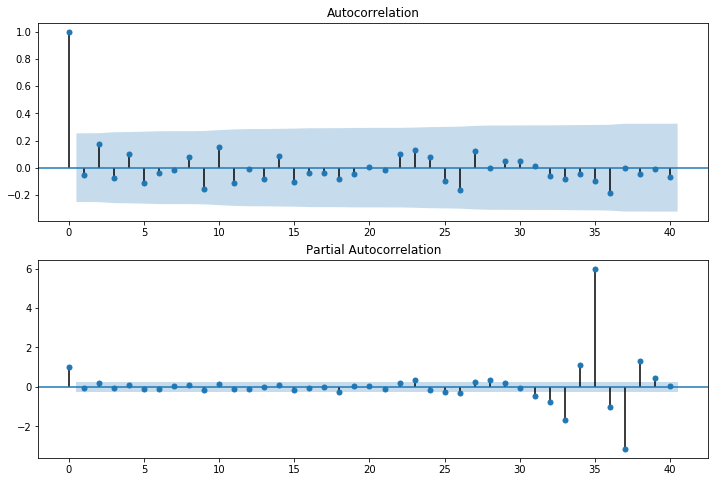

In [28]:
model=sm.tsa.ARIMA(endog=alameda_data['SalePrice'],exog=alameda_data['UnemployRate'],order=(10,1,1))
results=model.fit()
print(results.summary())

results.resid.plot()
plt.show()
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(results.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(results.resid, lags=40, ax=ax2)
plt.show()

KeyError: '2013-01-01'